#  T M V A_Tutorial_Classification_Tmva_App
TMVA example, for classification
 with following objectives:
 * Apply a BDT with TMVA




**Author:** Lailin XU  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Tuesday, April 27, 2021 at 01:21 AM.</small></i>

In [1]:
from ROOT import TMVA, TFile, TTree, TCut, TH1F, TCanvas, gROOT, TLegend
from subprocess import call
from os.path import isfile
from array import array
 
gROOT.SetStyle("ATLAS")

Welcome to JupyROOT 6.22/07


Setup TMVA

In [2]:
TMVA.Tools.Instance()

Reader. One reader for each application.

In [3]:
reader = TMVA.Reader("Color:!Silent")
reader_S = TMVA.Reader("Color:!Silent")
reader_B = TMVA.Reader("Color:!Silent")
 

Inputs
=============
Load data
An unknown sample

In [4]:
trfile = "Zp2TeV_ttbar.root"
data = TFile.Open(trfile)
tree = data.Get('tree')

Known signal

In [5]:
trfile_S = "Zp1TeV_ttbar.root"
data_S = TFile.Open(trfile_S)
tree_S = data_S.Get('tree')

Known background

In [6]:
trfile_B = "SM_ttbar.root"
data_B = TFile.Open(trfile_B)
tree_B = data_B.Get('tree')
 

Set input variables. Do this for each reader

In [7]:
branches = {}
for branch in tree.GetListOfBranches():
    branchName = branch.GetName()
    branches[branchName] = array('f', [-999])
    tree.SetBranchAddress(branchName, branches[branchName])
    if branchName not in ["mtt_truth", "weight", "nlep", "njets"]:
        reader.AddVariable(branchName, branches[branchName])

branches_S = {}
for branch in tree_S.GetListOfBranches():
    branchName = branch.GetName()
    branches_S[branchName] = array('f', [-999])
    tree_S.SetBranchAddress(branchName, branches_S[branchName])
    if branchName not in ["mtt_truth", "weight", "nlep", "njets"]:
        reader_S.AddVariable(branchName, branches_S[branchName])

branches_B = {}
for branch in tree_B.GetListOfBranches():
    branchName = branch.GetName()
    branches_B[branchName] = array('f', [-999])
    tree_B.SetBranchAddress(branchName, branches_B[branchName])
    if branchName not in ["mtt_truth", "weight", "nlep", "njets"]:
        reader_B.AddVariable(branchName, branches_B[branchName])
 

Book method(s)
=============
BDT

In [8]:
methodName1 = "BDT"
weightfile = 'dataset/weights/TMVAClassification_{0}.weights.xml'.format(methodName1)
reader.BookMVA( methodName1, weightfile )
reader_S.BookMVA( methodName1, weightfile )
reader_B.BookMVA( methodName1, weightfile )

                         : Booking "BDT" of type "BDT" from dataset/weights/TMVAClassification_BDT.weights.xml.
                         : Reading weight file: dataset/weights/TMVAClassification_BDT.weights.xml
DataSetInfo              : [Default] : Added class "Signal"
DataSetInfo              : [Default] : Added class "Background"
                         : Booked classifier "BDT" of type: "BDT"
                         : Booking "BDT" of type "BDT" from dataset/weights/TMVAClassification_BDT.weights.xml.
                         : Reading weight file: dataset/weights/TMVAClassification_BDT.weights.xml
DataSetInfo              : [Default] : Added class "Signal"
DataSetInfo              : [Default] : Added class "Background"
                         : Booked classifier "BDT" of type: "BDT"
                         : Booking "BDT" of type "BDT" from dataset/weights/TMVAClassification_BDT.weights.xml.
                         : Reading weight file: dataset/weights/TMVAClassification_BDT

BDTG

In [9]:
methodName2 = "BDTG"
weightfile = 'dataset/weights/TMVAClassification_{0}.weights.xml'.format(methodName2)
reader.BookMVA( methodName2, weightfile )
reader_S.BookMVA( methodName2, weightfile )
reader_B.BookMVA( methodName2, weightfile )

                         : Booking "BDTG" of type "BDT" from dataset/weights/TMVAClassification_BDTG.weights.xml.
                         : Reading weight file: dataset/weights/TMVAClassification_BDTG.weights.xml
                         : Booked classifier "BDTG" of type: "BDT"
                         : Booking "BDTG" of type "BDT" from dataset/weights/TMVAClassification_BDTG.weights.xml.
                         : Reading weight file: dataset/weights/TMVAClassification_BDTG.weights.xml
                         : Booked classifier "BDTG" of type: "BDT"
                         : Booking "BDTG" of type "BDT" from dataset/weights/TMVAClassification_BDTG.weights.xml.
                         : Reading weight file: dataset/weights/TMVAClassification_BDTG.weights.xml
                         : Booked classifier "BDTG" of type: "BDT"


Loop events for evaluation
================

Book histograms

In [10]:
nbins, xmin, xmax=20, -1, 1

Signal

In [11]:
tag = "S"
hname="BDT_{0}".format(tag)
h1 = TH1F(hname, hname, nbins, xmin, xmax)
h1.Sumw2()
hname="BDTG_{0}".format(tag)
h2 = TH1F(hname, hname, nbins, xmin, xmax)
h2.Sumw2()

nevents = tree_S.GetEntries()
for i in range(nevents):
  tree_S.GetEntry(i)

  BDT = reader_S.EvaluateMVA(methodName1)
  BDTG = reader_S.EvaluateMVA(methodName2)
  h1.Fill(BDT)
  h2.Fill(BDTG)

Background

In [12]:
tag = "B"
hname="BDT_{0}".format(tag)
h3 = TH1F(hname, hname, nbins, xmin, xmax)
h3.Sumw2()
hname="BDTG_{0}".format(tag)
h4 = TH1F(hname, hname, nbins, xmin, xmax)
h4.Sumw2()

nevents = tree_B.GetEntries()
for i in range(nevents):
  tree_B.GetEntry(i)

  BDT = reader_B.EvaluateMVA(methodName1)
  BDTG = reader_B.EvaluateMVA(methodName2)
  h3.Fill(BDT)
  h4.Fill(BDTG)

New sample

In [13]:
tag = "N"
hname="BDT_{0}".format(tag)
h5 = TH1F(hname, hname, nbins, xmin, xmax)
h5.Sumw2()
hname="BDTG_{0}".format(tag)
h6 = TH1F(hname, hname, nbins, xmin, xmax)
h6.Sumw2()

nevents = tree.GetEntries()
for i in range(nevents):
  tree.GetEntry(i)

  BDT = reader.EvaluateMVA(methodName1)
  BDTG = reader.EvaluateMVA(methodName2)
  h5.Fill(BDT)
  h6.Fill(BDTG)

Helper function to normalize hists

In [14]:
def norm_hists(h):

  h_new = h.Clone()
  hname = h.GetName() + "_normalized"
  h_new.SetName(hname)
  h_new.SetTitle(hname)
  ntot = h.Integral()
  if ntot!=0:
    h_new.Scale(1./ntot)

  return h_new

Plotting

In [15]:
myc = TCanvas("c", "c", 800, 600)
myc.SetFillColor(0)
myc.cd()

Compare the performance for BDT

In [16]:
nh1 = norm_hists(h1)
nh1.GetXaxis().SetTitle("BDT")
nh1.GetYaxis().SetTitle("A.U.")
nh1.Draw("hist")
nh3 = norm_hists(h3)
nh3.SetLineColor(2)
nh3.SetMarkerColor(2)
nh3.Draw("same hist")
nh5 = norm_hists(h5)
nh5.SetLineColor(4)
nh5.SetMarkerColor(4)
nh5.Draw("same")

ymin = 0
ymax = max(nh1.GetMaximum(), nh3.GetMaximum(), nh5.GetMaximum())
nh1.GetYaxis().SetRangeUser(ymin, ymax*1.5)

Draw legends

Info in <TCanvas::Print>: png file TMVA_tutorial_cla_app_1.png has been created


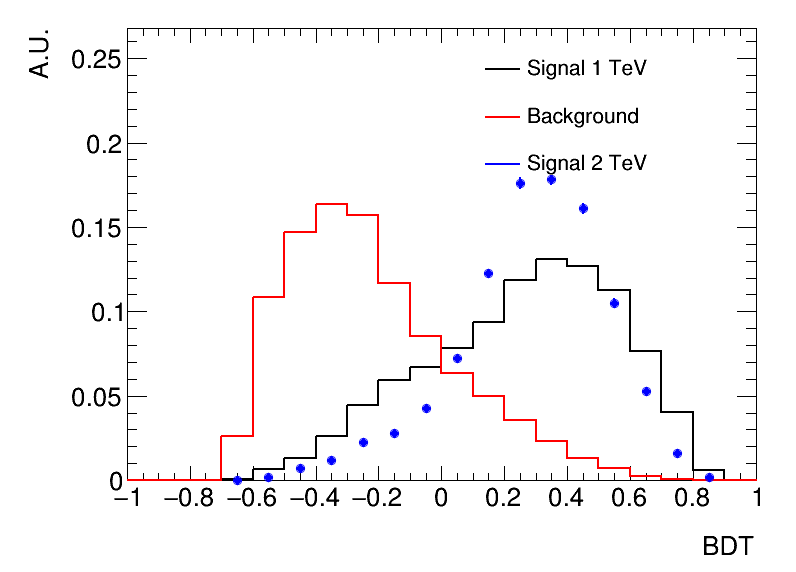

In [17]:
lIy = 0.92
lg = TLegend(0.60, lIy-0.25, 0.85, lIy)
lg.SetBorderSize(0)
lg.SetFillStyle(0)
lg.SetTextFont(42)
lg.SetTextSize(0.04)
lg.AddEntry(nh1, "Signal 1 TeV", "l")
lg.AddEntry(nh3, "Background", "l")
lg.AddEntry(nh5, "Signal 2 TeV", "l")
lg.Draw()

myc.Draw()
myc.SaveAs("TMVA_tutorial_cla_app_1.png")

Compare the performance for BDTG

In [18]:
nh1 = norm_hists(h2)
nh1.GetXaxis().SetTitle("BDTG")
nh1.GetYaxis().SetTitle("A.U.")
nh1.Draw("hist")
nh3 = norm_hists(h4)
nh3.SetLineColor(2)
nh3.SetMarkerColor(2)
nh3.Draw("same hist")
nh5 = norm_hists(h6)
nh5.SetLineColor(4)
nh5.SetMarkerColor(4)
nh5.Draw("same")

ymin = 0
ymax = max(nh1.GetMaximum(), nh3.GetMaximum(), nh5.GetMaximum())
nh1.GetYaxis().SetRangeUser(ymin, ymax*1.5)

Draw legends

Info in <TCanvas::Print>: png file TMVA_tutorial_cla_app_2.png has been created


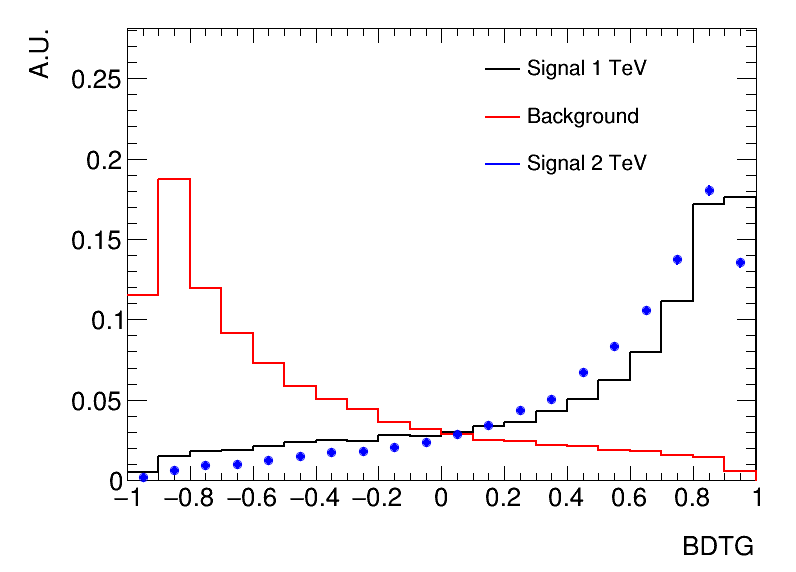

In [19]:
lIy = 0.92
lg = TLegend(0.60, lIy-0.25, 0.85, lIy)
lg.SetBorderSize(0)
lg.SetFillStyle(0)
lg.SetTextFont(42)
lg.SetTextSize(0.04)
lg.AddEntry(nh1, "Signal 1 TeV", "l")
lg.AddEntry(nh3, "Background", "l")
lg.AddEntry(nh5, "Signal 2 TeV", "l")
lg.Draw()

myc.Draw()
myc.SaveAs("TMVA_tutorial_cla_app_2.png")

Draw all canvases 

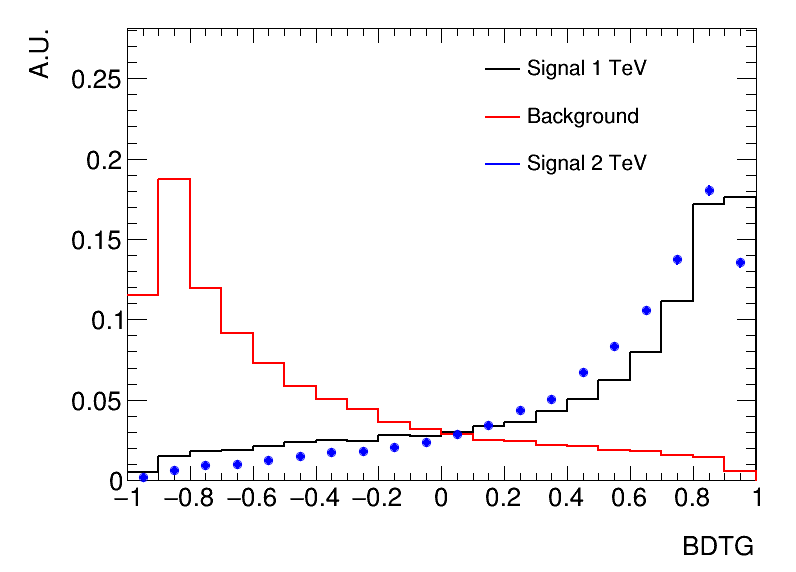

In [20]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()